Labor Market Model

First we will solve analytically the model, specifying our solution before proceds putting the respective values and make the accordengly compuations 

 We have the model

\begin{eqnarray}
\left \{
\begin{array}{ccc}
L^d=a_d-b_d(w+T)\\
L^s=-a_z+b_zw\\
L^d=L^s
\end{array}
\right .
\end{eqnarray}

The model in matrix formula $(AX=B)$ can be written as 

$$ 
\underbrace{
\begin{bmatrix}
1&b_d \\
\\
1&-b_z
\end{bmatrix}
}_{ A}
\underbrace{
\begin{bmatrix}
L\\
\\
w
\end{bmatrix}
}_{X}
=
\underbrace{
\begin{bmatrix}
a_d - b_dT\\
\\
-a_z
\end{bmatrix}
}_{ B}
$$

If we let $A$ be the $2 \times 2$ matrix of coefficients, we can check that the determinant $|A|=-(b_d+b_z) \neq 0$, and we can apply the theorem outlined in the previous section. In what follows- and in the pseudo code of Box number 2-  can consider the vector $B(\tau)$ as a function of the tax paid 

$$ B(T)= \begin{bmatrix}
a_d - b_dT\\
\\
-a_z
\end{bmatrix}
$$

so that we make clear that the model can be solved for different values of the tax. 
The solution to the market equilibriums described by a vector 

$$
 X^*=\begin{bmatrix}
L^* \\
\\
w^*
\end{bmatrix}
$$

The solution to  basic market model is  
\begin{equation}
 X^*(T)= A^{-1} B(T)
\end{equation}

That would be 
$$
\underbrace{
\begin{bmatrix}
\frac{b_z}{b_d+b_z}&\frac{b_d}{b_d+b_z}\\
\\
\frac{1}{b_d+b_z}&-\frac{1}{b_d+b_z}\\\\
\end{bmatrix}
}_{ A^-1}
\underbrace{
\begin{bmatrix}
a_d - b_dT\\
\\
-a_z
\end{bmatrix}
}_{ B}
=
\underbrace{
\begin{bmatrix}
L*\\
\\
w*
\end{bmatrix}
}_{ X*}
$$

Where the matrix $X^*$ is equal to

$$
\begin{bmatrix}
a_d-b_dT(\frac{b_z}{b_d+b_z})-a_z(\frac{b_d}{b_d+b_z})\\
\\
a_d-b_dT(\frac{1}{b_d+b_z})+a_z(\frac{1}{b_d+b_z})
\end{bmatrix}
=
\begin{bmatrix}
L*\\
\\
w*
\end{bmatrix}
$$

We set out paramater and upload numpy as well matplotlib

In [98]:
import numpy as np
import matplotlib.pyplot as plt

ad=10
bd=0.4
az=5
bz=0.4
T=2

We impose a condition for have a solution  

In [99]:
if ad < az:
    raise ValueError('No Market. Insufficient Demand.') #the matrix is not invertable 

We create assign values for our array A

In [100]:
A=np.zeros((2,2))
A   

A[0,0]=1
A[0,1]=bd
A[1,0]=1
A[1,1]=-bz

we make become the array in matrix and find the inverse $A^-1$, necessary to have our solution to the model

In [101]:
A=np.asmatrix(A) 
A_inv=np.linalg.inv(A) #I use the tools for linear algebra
A_inv

matrix([[ 0.5 ,  0.5 ],
        [ 1.25, -1.25]])

In [102]:
def B_taxes(T): #is a function, b is a function of tax
    B=np.zeros((2,1))
    B[0,0]=ad-bd*T
    B[1,0]=-az
    return B

def Mkt_eq(tau):
    X_star=A_inv*B_taxes(tau)
    return X_star


The solution to the model is...

In [103]:
eq_tax=Mkt_eq(T) 
L_taxT=Mkt_eq(T)[0]
w_taxT=Mkt_eq(T)[1]
eq_tax

matrix([[ 2.1 ],
        [17.75]])

The solution to the model with the new tax T1=1.1*T is...

In [104]:
eq_no_tax=Mkt_eq(tau=T*1.1)
L_taxT1=Mkt_eq(tau=T*1.1)[0]
w_taxT1=Mkt_eq(tau=T*1.1)[1]
eq_no_tax

matrix([[ 2.06],
        [17.65]])

In [105]:
#Now we must fin the elasticity 
change_l=(L_taxT-L_taxT1/L_taxT)
change_w=(w_taxT-w_taxT1/w_taxT)
elasticity=abs(change_l/change_w)

In [106]:
elasticity

matrix([[0.06678635]])

In [110]:
#generatin 10 values of bz and 10 values for the elasticity 
lista=[]
bz_sequence=np.linspace(bz, 2*bz, 10)

def  allelasticities(T,tau=T*1.1):
    first=Mkt_eq(tau=T*1.1) 
    second=Mkt_eq(T)
    optimal_w=second[1]-first[1]
    optimal_l=second[0]-first[0]
    finalresult=abs(( optimal_l/first[0])/(optimal_w/first[1]))
    return finalresult

In [111]:
for x in bz_sequence:
    A[1,1]=-x
    A_inv=np.linalg.inv(A)
    results=allelasticities(T,tau=T*1.1)
    lista.append(float(results))
print(lista)

[3.4271844660193724, 3.0562770562770045, 2.807664497469249, 2.629422718808184, 2.495377922784144, 2.390904692791491, 2.3071895424837146, 2.2386048355132733, 2.1813885859687323, 2.1329305135951517]


Text(0, 0.5, 'Elasticity depending on bz_value')

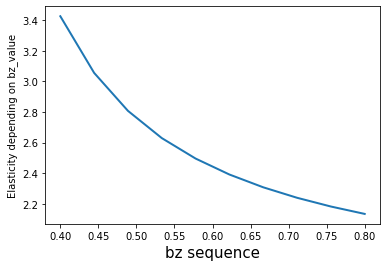

In [112]:
fig, ax =plt.subplots()
plt.plot(bz_sequence, lista ,linewidth=2)
ax.set_xlabel('bz sequence', fontsize=15)
ax.set_ylabel('Elasticity depending on bz_value', fontsize=10)


__Exercise 2: Cookies market__

We specify our demand and supply function

 We have the model

\begin{eqnarray}
\left \{
\begin{array}{ccc}
Q^d=\frac{(y)^{\alpha}}{(p)^{\beta}}\\
Q^s=(p)^{\gamma}\\
Q^d=Q^s
\end{array}
\right .
\end{eqnarray}

where $y$ is the income of the consumer; $p$ are the price of the cookies and $\alpha$ is the elasticity of the demadn with respect the income, $\beta$ is is the elasticity of of the demand with respect prices and $ \gamma $ is the elasticity of supply with respect prices. 

a) Ensure, analytically, that an equilibrium exist in the market with the function
chosen.    

a.1 Assumptions about our variables and parameters: 

a.1.1) $Q^d(y,p,\alpha,\beta)$ and $Q^s(p,\gamma)$ are continuous.

a.1.2) Prices (p) and income (y) are strictly positives $R_{++}^p$; parameters $\alpha$; $\beta$ and $\gamma$ are $>0$
    
a.1.3) $\frac{\partial Q^d}{\partial y}>0 \ ; \ \frac{\partial Q^d}{\partial p}<0 \ ; \ \frac{\partial Q^s}{\partial p}>0$

under these assumptions there is a point where function find traverse  

__b) Write a Python script that applies the bisection method to  nd the equilibrium
price and quantity in your market. Explain carefully in the script what exactly you are doing in each step.__

In [113]:
import numpy as np

#setting parametters 

y=100
alpha=1.2
beta=1.2
gamma=1.8

def supply(p,k=gamma):
    return p**k

def demand(p,y,a=alpha,b=beta):
    return y**a/p**b

def market(p):
    return supply(p,k=gamma)-demand(p,y,a=alpha,b=beta)

#we set out general function to use bisection method

def solve_by_bisection(f,a,b,tol=10e-4): #we set values inside functiont: f=function to sasitfy, a and b=interval points, tol=error marging
    lower, upper = a, b # lower and upper interval within the function change sign
    while upper - lower>tol:  #if the distance between interval point is bigger that tolerance do the following...
        middle = 0.5*(upper+lower) #Calculating the midpoint of the interval a, b 
        if f(middle)>0: #if the value of the function at the point "middle" is higher than zero we make this cycle:
            lower, upper=lower, middle 
        else:
            lower, upper=middle, upper
#if convergence is woktking (that is is sufficiently small), stop iterating
    return 0.5*(upper+lower)


In [114]:
solution=solve_by_bisection(market,1,150,tol=10e-4)
print ("Price of equilibrium with bisection:", solution)

Price of equilibrium with bisection: 6.309614181518555


We can also observe the equiibirum graphically 

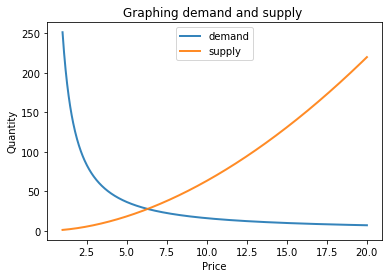

In [115]:
y_demand=[]
for i in np.linspace(1,20, 800):
    result = demand(p=i,y=100)
    y_demand.append(result)
    
y_supply=[]
for i in np.linspace(1, 20, 800):
    result= supply(p=i)
    y_supply.append(result)
    
import matplotlib.pyplot as plt

x_axis = np.linspace(1, 20, 800)
y_axis_demand = demand(x_axis,y,a=alpha,b=beta)
y_axis_supply = supply(x_axis,k=gamma)

fig, ax = plt.subplots()

plt.plot(x_axis, y_demand, label="demand", alpha=0.9, linewidth=2)
plt.plot(x_axis, y_supply, label="supply", alpha=0.9, linewidth=2)

plt.title("Graphing demand and supply ")
plt.xlabel("Price")
plt.ylabel("Quantity")

plt.legend()

plt.show()

__c) Write a similar code to that of the previous code that uses the Newton method
or the Secant method to  nd the the equilibrium.__

In [116]:
x0=100
Tol=1e-8
metric=1

def supplynewton(p,k=gamma):
    return k*p**(k-1)

def demandnewton(p,y,a=alpha,b=beta):
    return -b*p**(b-1)

def marketnewton(p):
    return supplynewton(p,k=gamma)-demandnewton(p,y,a=alpha,b=beta)

while metric>Tol:
    fn=market(x0)
    dfn=marketnewton(x0) 
    x_n=x0-fn/dfn
    x0=x_n
    metric=abs(fn)  
print(x_n)
    

6.309573444528382


 __d) Consider a sequence of n values of y, $(y_i)_{i=0}^{i=n}$  , Find the equilibrium and price
 and quantities for each value of the income speci ed. In other words, $(p_i(y_i))_{i=0}^{i=n}$ and $(q_i(y_i))_{i=0}^{i=n}$  nd equilibrium
arrays__

In [117]:
y_i=np.linspace(10,300,30)
equilibrium_quantities=[]
equilibrium_prices=[]

for i in y_i:
    def demand2(p,y=i,a=alpha,b=beta):
        return y**a/p**b

    def marketsequence(p):
        return supply(p)-demand2(p)
    
    equilibriumprices = solve_by_bisection(marketsequence,1,150)
    equilibriumquantities = demand2(equilibriumprices)
    equilibrium_quantities.append(equilibriumquantities)
    equilibrium_prices.append(equilibriumprices) 

allprices=np.array(equilibrium_prices)
allquantities=np.array(equilibrium_quantities)

allprices
allquantities

array([ 5.24871027,  8.64533101, 11.57560979, 14.23822323, 16.72076955,
       19.06748833, 21.30438292, 23.45451797, 25.52969267, 27.54207365,
       29.49962987, 31.40503915, 33.26971522, 35.09291813, 36.87801064,
       38.63357588, 40.35671196, 42.05376373, 43.72317232, 45.36610727,
       46.99064506, 48.58941769, 50.16963494, 51.73059582, 53.27515951,
       54.80195199, 56.30923217, 57.80320056, 59.28174841, 60.74669726])

In [118]:
from scipy.integrate import quad

def inv_supply(q,k=gamma):
    return q**(1/k)

def inv_demand(q,y,a=alpha,b=beta):
    return y**a/q**(1/b)

def inteI(q):
    return inv_demand(q,y,a=alpha,b=beta)

def inteII(q):
    return inv_supply(q,k=gamma)

quantity_in_equilibrium = demand(solution,y,a=alpha,b=beta)
price_in_equilibrium = solution

area_demand, error_c = quad(inteI,0.0001,quantity_in_equilibrium)
WC=area_demand-quantity_in_equilibrium*price_in_equilibrium
quantityoptimal = supply(solution,k=gamma)
area_supply, error_s = quad(inteII,0.0001,quantityoptimal)
WS=quantityoptimal*solution-area_supply
surplus=WC+WS

print("Consumer surplus is:", WC)
print("Pruductor surplus is ", WS)
print ("Market surplus is", surplus)


Consumer surplus is: 2120.6100370962145
Pruductor surplus is  62.065437635676545
Market surplus is 2182.675474731891
